# Problem 1: Computing $\pi$ with Monte Carlo

In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#1.1 (generate random samples) 
def x_sample(N):
    rngx = np.random.default_rng()  # create a random number generator for x (non-deterministic)
    return rngx.uniform(-1, 1, size=N)  # generate N random x coordinates in [-1, 1) as array
def y_sample(N):
    rngy = np.random.default_rng()  # create a random number generator for y (non-deterministic)
    return rngy.uniform(-1, 1, size=N)  # generate N random y coordinates in [-1, 1) as array

#1.2 (estimate π using Monte Carlo method)
def estimate_pi(N):
    x = x_sample(N) 
    y = y_sample(N)
    inside_circle = (x**2 + y**2) <= 1 # squares each element of x and y, sums them pairwise, and checks if the result is <= 1
    return 4 * np.sum(inside_circle) / N # inside_circle is a boolean array, trues count as 1, falses as 0

N = int(input("Enter number of samples N: ")) # user input (integer) for number of samples
print(f"The estimate of π with {N} samples is π ~ {estimate_pi(N)}")

The estimate of π with 500 samples is π ~ 3.12


Text(0.5, 1.0, 'Mean Estimate of π vs Number of Samples')

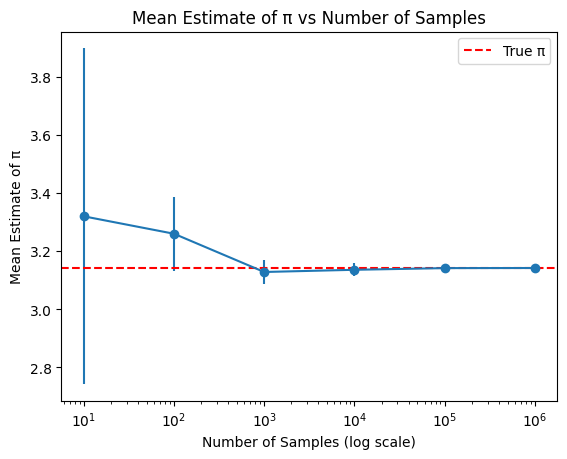

In [ ]:
#1.3 (plot mean estimate of π vs number of samples with error bars)
sample_arr = np.array([10, 100, 1000, 10000, 100000, 1000000]) # array of sample sizes
trials = 10 # number of trials for each sample size

def pi_estimate_arr(N, trials): # function to get array of pi estimates for given N and number of trials
    pi_list = [] 
    for i in range(trials): 
        pi_list.append(estimate_pi(N)) # append pi estimate to pi_list
    return np.array(pi_list) # convert list to array and return it

pi_mean_list = []
for N in sample_arr: 
    pi_mean = np.mean(pi_estimate_arr(N, trials)) # calculate mean of pi estimates for current sample size
    pi_mean_list.append(pi_mean) # append mean to pi_mean_list
pi_mean_arr = np.array(pi_mean_list) # convert list of means to array

pi_std_list = [] 
for N in sample_arr:
    pi_std = np.std(pi_estimate_arr(N, trials)) # calculate standard deviation of pi estimates for current sample size
    pi_std_list.append(pi_std) # append standard deviation to pi_std_list
pi_std_arr = np.array(pi_std_list) # convert list of standard deviations to array

plt.errorbar(sample_arr, pi_mean_arr, yerr = pi_std_arr, fmt ='-o') # plot of means with points connected by lines with error bars = ± 1 std
plt.xscale('log') # set x-axis to logarithmic scale
plt.yscale('linear') # set y-axis to linear scale
plt.axhline(y=np.pi, color = 'r', linestyle = '--', label ='True π') # horizontal line for true value of pi
plt.legend()
plt.xlabel('Number of Samples (log scale)')    
plt.ylabel('Mean Estimate of π')
plt.title('Mean Estimate of π vs Number of Samples')

# Problem 2: Computing $\pi$ the Old-Fashioned Way

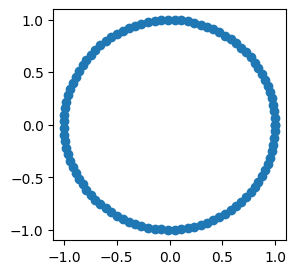

In [239]:
#2.1 (generate evenly spaced points on unit circle)
def points_arrs(N):
    thetas = np.linspace(0,2*np.pi,num=N) # generate N evenly spaced angles from 0 to 2π (always includes endpoints, unlike np.uniform)
    xs = np.cos(thetas) # x-coordinates on unit circle
    ys = np.sin(thetas) # y-coordinates on unit circle
    return xs, ys 
xs, ys = points_arrs(100) # example with 100 points
plt.figure(figsize=(3,3)) # set figure size to be square
plt.plot(xs, ys, 'o-') # plot and connect with lines

In [ ]:
#2.2 (compute distance between adjacent points)
def distance_arr(xs, ys):
    dx = np.diff(xs) # differences between adjacent x-coordinates, generated as array
    dy = np.diff(ys) # differences between adjacent y-coordinates, generated as array
    distances = np.sqrt(dx**2 + dy**2) # Euclidean distances between adjacent points, generated as array
    return distances

Text(0.5, 1.0, 'Estimate of π vs Number of Samples')

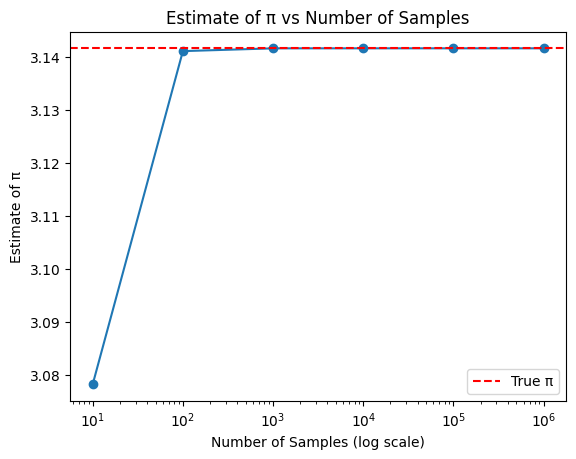

In [240]:
#2.3 (plot estimate of π vs number of samples)
pi_estimate_list = []
sample_arr = np.array([10, 100, 1000, 10000, 100000, 1000000]) # array of sample sizes
for N in sample_arr: 
    xs, ys = points_arrs(N)
    pi_estimate = np.sum(distance_arr(xs,ys)) / 2 # estimate of pi using perimeter method
    pi_estimate_list.append(pi_estimate)  # append estimate to list
pi_estimate_arr = np.array(pi_estimate_list)  # convert list of estimates to array

plt.plot(sample_arr, pi_estimate_arr, '-o') # plot of estimates with points connected by lines
plt.xscale('log') # set x-axis to logarithmic scale
plt.yscale('linear') # set y-axis to linear scale
plt.axhline(y=np.pi, color='r', linestyle='--', label='True π') # horizontal line for true value of pi
plt.legend()
plt.xlabel('Number of Samples (log scale)')    
plt.ylabel('Estimate of π')
plt.title('Estimate of π vs Number of Samples')

In [ ]:
# Level-Up (O(1) algorithm)


# Problem 3: Primed for Computational Physics

In [ ]:
#3.1 (computing all primes up to N >= 2 using trial division)
def primes_trial_div(N):
    primes = [] # empty list to collect primes
    for i in range(2, N+1): # check each integer from 2 to N
        for j in range(2, i): # test divisors from 2 to i-1
            if i % j == 0: # if i is divisible by j, it's not prime
                break # exit inner loop if not prime
        else: # else clause of inner loop executes if no break occurs (i.e., i is prime)
            primes.append(i)
    return np.array(primes) # return prime list as array

N = int(input("Enter an integer N >= 2 "))  # user input for upper limit N
print(f"The primes less than or equal to {N} is {primes_trial_div(N)}")


The primes less than or equal to 35 is [ 2  3  5  7 11 13 17 19 23 29 31]


In [250]:
#3.2 (sieve of Eratosthenes)
def primes_sieve(N):

    # Step 1: start with all numbers "marked prime"
    is_prime = np.ones(N+1, dtype=bool)
    
    # Step 2: 0 and 1 are not prime
    is_prime[0:2] = False
    
    # Step 3: mark multiples of each prime
    for p in range(2, int(N**0.5) + 1):
        if is_prime[p]:
            is_prime[p*p:N+1:p] = False   # start at p^2, step by p
    
    # Step 4: extract indices where True
    primes = np.nonzero(is_prime)[0]
    return primes

N = int(input("Enter an integer N >= 2 "))  # user input for upper limit N
print(f"The primes less than or equal to {N} is {primes_sieve(N)}")


The primes less than or equal to 15 is [ 2  3  5  7 11 13]


The power law exponent for Trial Division is ~ 1.8232040860854637
The power law exponent for Sieve of Eratosthenes is ~ 0.3353519357096368


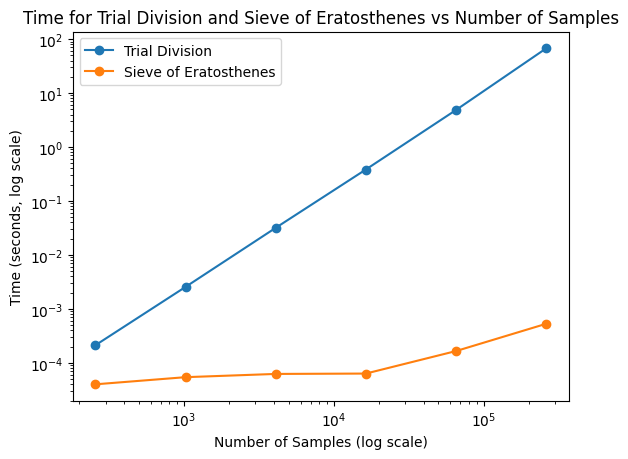

In [ ]:
#3.3 (plot execution time vs number of samples for both algorithms, fit polynomial to log-log data to estimate time complexity)
import time # import time module to measure execution time
Ns = np.array([4**k for k in range(4,10)]) 
time_list_1 = []
time_list_2 = []
for N in Ns:
    start_time_1 = time.perf_counter() # start timer 
    primes_trial_div(N)
    end_time_1 = time.perf_counter() # end timer 
    elapsed_time_1 = end_time_1 - start_time_1
    time_list_1.append(elapsed_time_1) # append elapsed time to list
    # do same for sieve method
    start_time_2 = time.perf_counter() 
    primes_sieve(N)
    end_time_2 = time.perf_counter() 
    elapsed_time_2 = end_time_2 - start_time_2
    time_list_2.append(elapsed_time_2) 

time_arr_1 = np.array(time_list_1) # convert list of times to array
time_arr_2 = np.array(time_list_2) 

plt.loglog(Ns, time_arr_1, '-o', label = 'Trial Division') # log-log plot of execution time vs number of samples (points connected by lines)
plt.loglog(Ns, time_arr_2, '-o', label = 'Sieve of Eratosthenes') 
plt.legend()
plt.xlabel('Number of Samples (log scale)')  
plt.ylabel('Time (seconds, log scale)')
plt.title('Time for Trial Division and Sieve of Eratosthenes vs Number of Samples') 

log_Ns = np.log(Ns) # take natural log of Ns, generated as array 
log_times_1 = np.log(time_arr_1) # take natural log of times, generated as array
log_times_2 = np.log(time_arr_2) 

coeffs_1 = np.polyfit(log_Ns, log_times_1, 1) # fit polynomial of degree 1 (line) to log-log data for trial division
print(f'The power law exponent for Trial Division is ~ {coeffs_1[0]}') # coeffs[0] is the coefficient of the highest degree term (i.e. the slope)

coeffs_2 = np.polyfit(log_Ns, log_times_2, 1) 
print(f'The power law exponent for Sieve of Eratosthenes is ~ {coeffs_2[0]}')
